# 📊 Демонстрация критерия Вилкоксона

Полная визуализация парного непараметрического статистического теста с пошаговым объяснением.


---

## 🚀 Назначение скрипта

Данный скрипт предоставляет **полную графическую демонстрацию** критерия Вилкоксона для парных измерений, включая:

- 📈 **Визуализацию** парных данных "до-после"
- 🔄 **Процесс ранжирования** абсолютных разностей
- 🧮 **Вычисление T-статистики**
- 💡 **Интерпретацию** результатов лечения/вмешательства
- 🎨 **Профессиональное оформление** для презентаций

---

🚀 Запуск графической демонстрации критерия Вилкоксона...


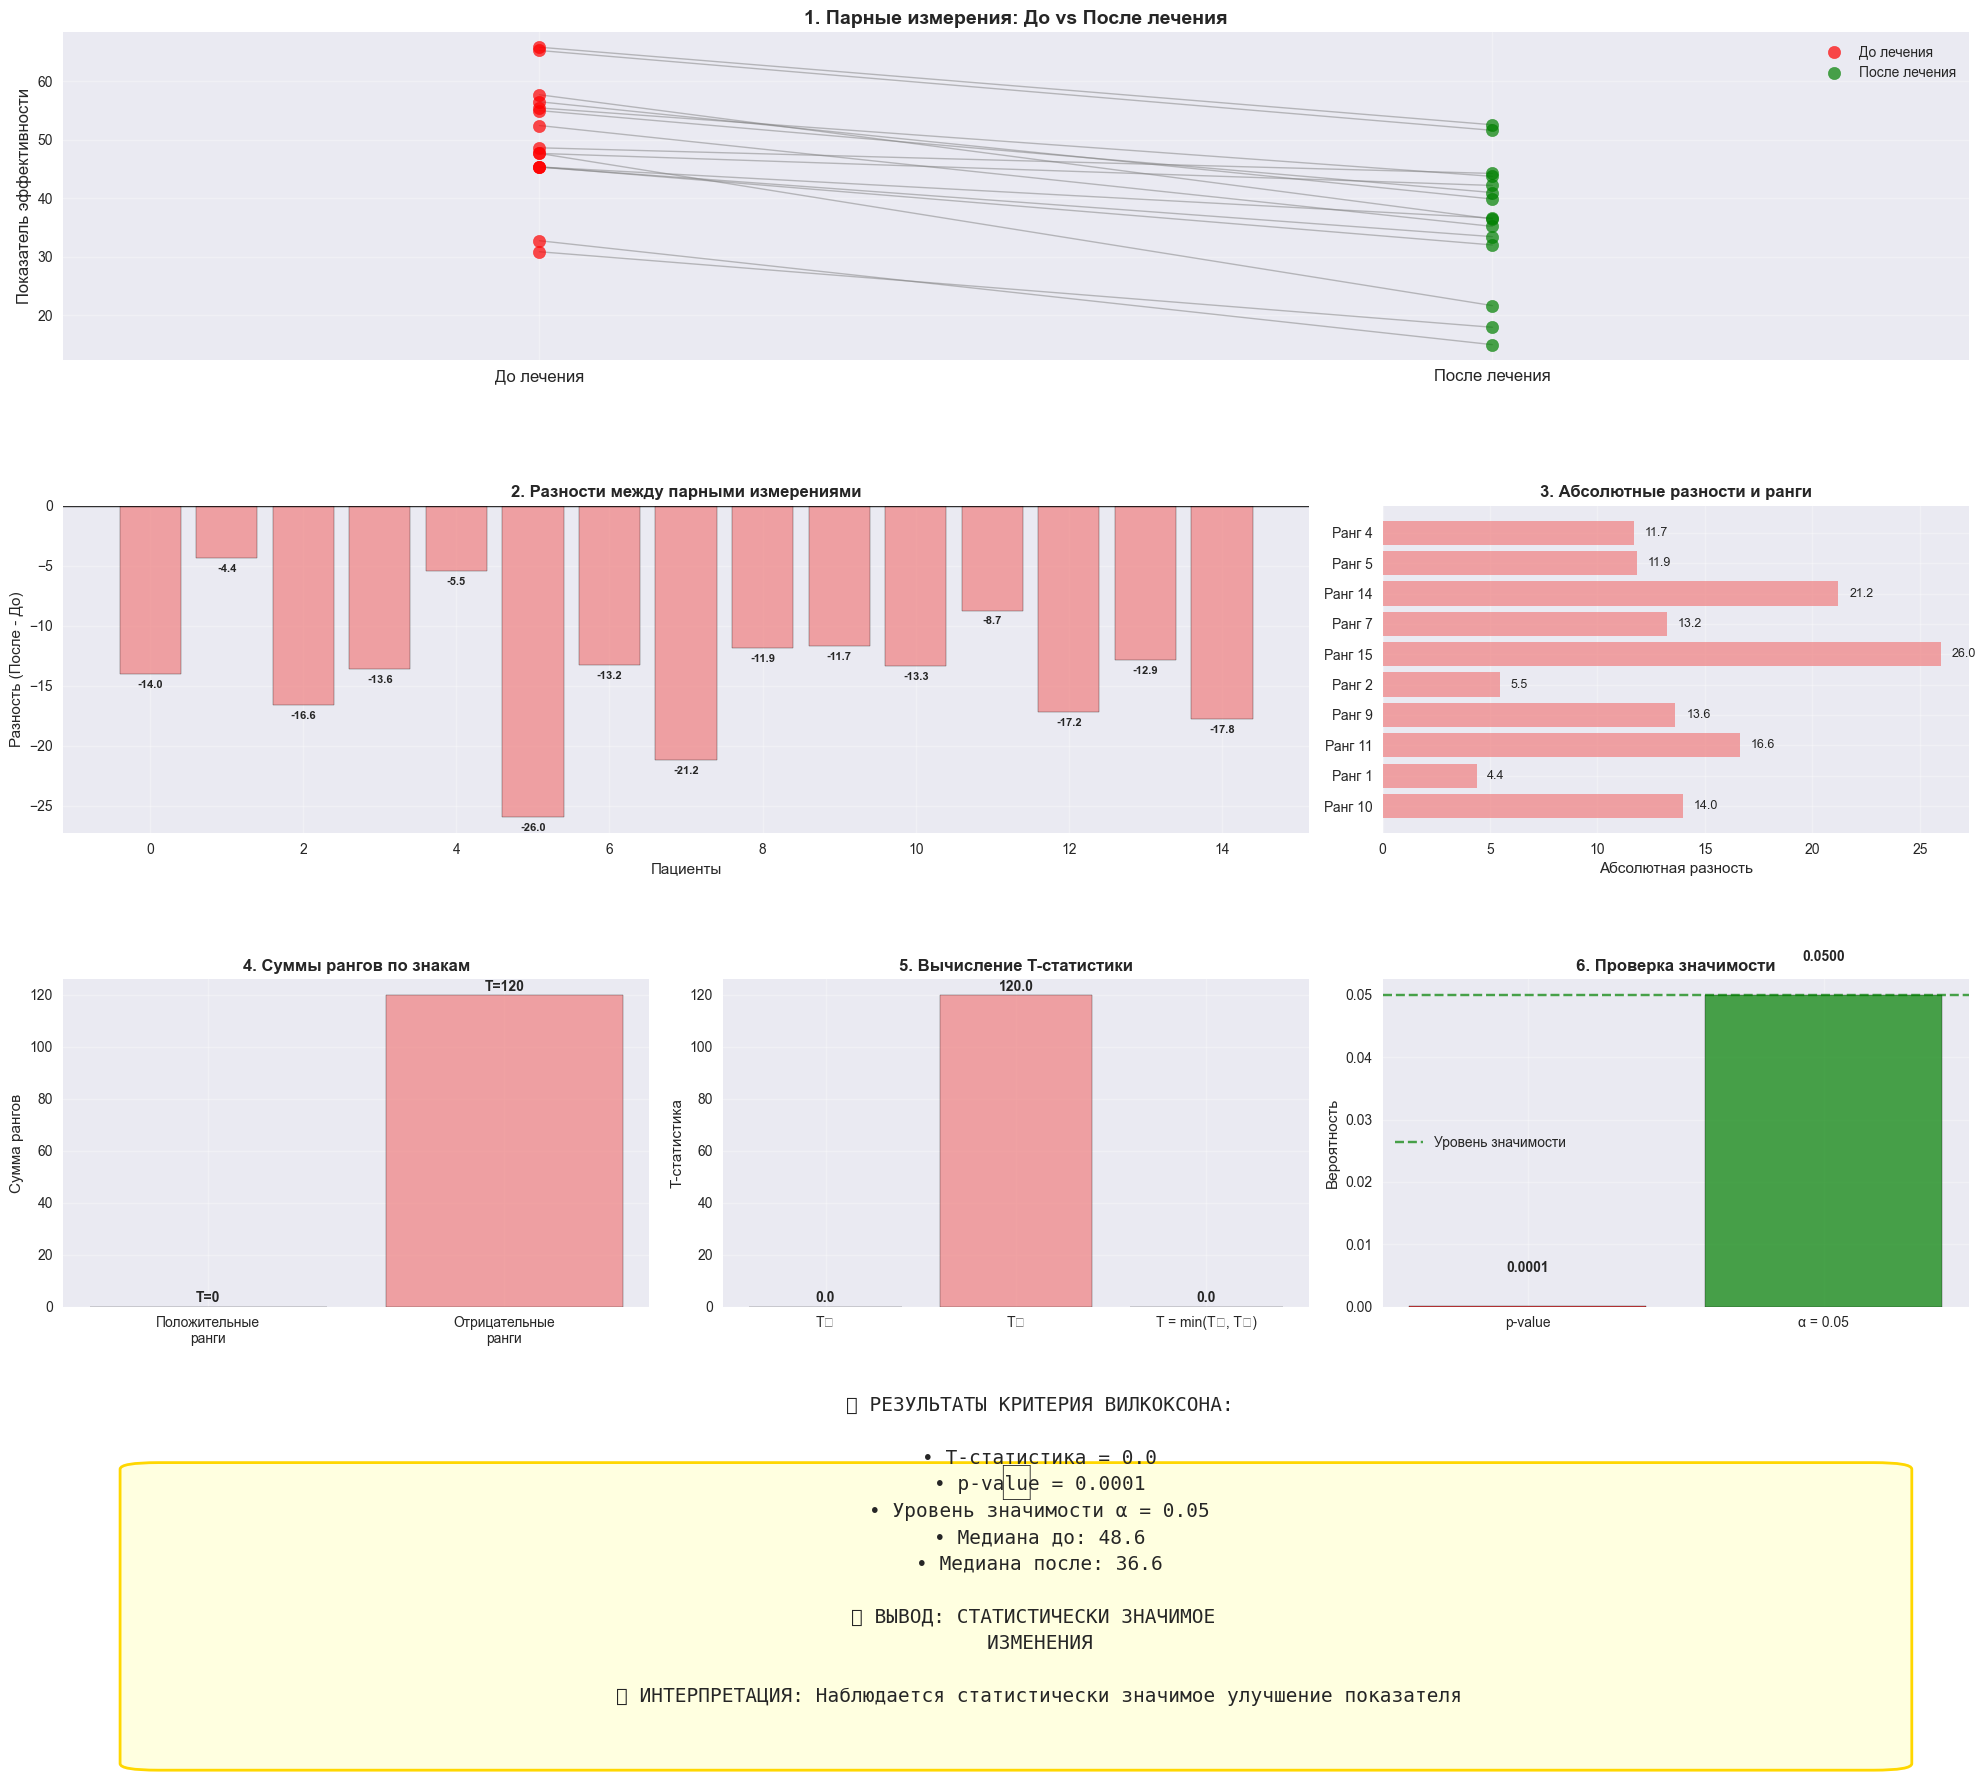


ДЕТАЛЬНАЯ СТАТИСТИЧЕСКАЯ ИНФОРМАЦИЯ:
Количество парных наблюдений: 15
Медиана до: 48.62
Медиана после: 36.61
Средняя разность: -13.87
Количество ненулевых разностей: 15
Сумма положительных рангов (T⁺): 0.0
Сумма отрицательных рангов (T⁻): 120.0
T-статистика: 0.0
p-value: 0.0001

🎯 Интерактивные примеры с разными сценариями...


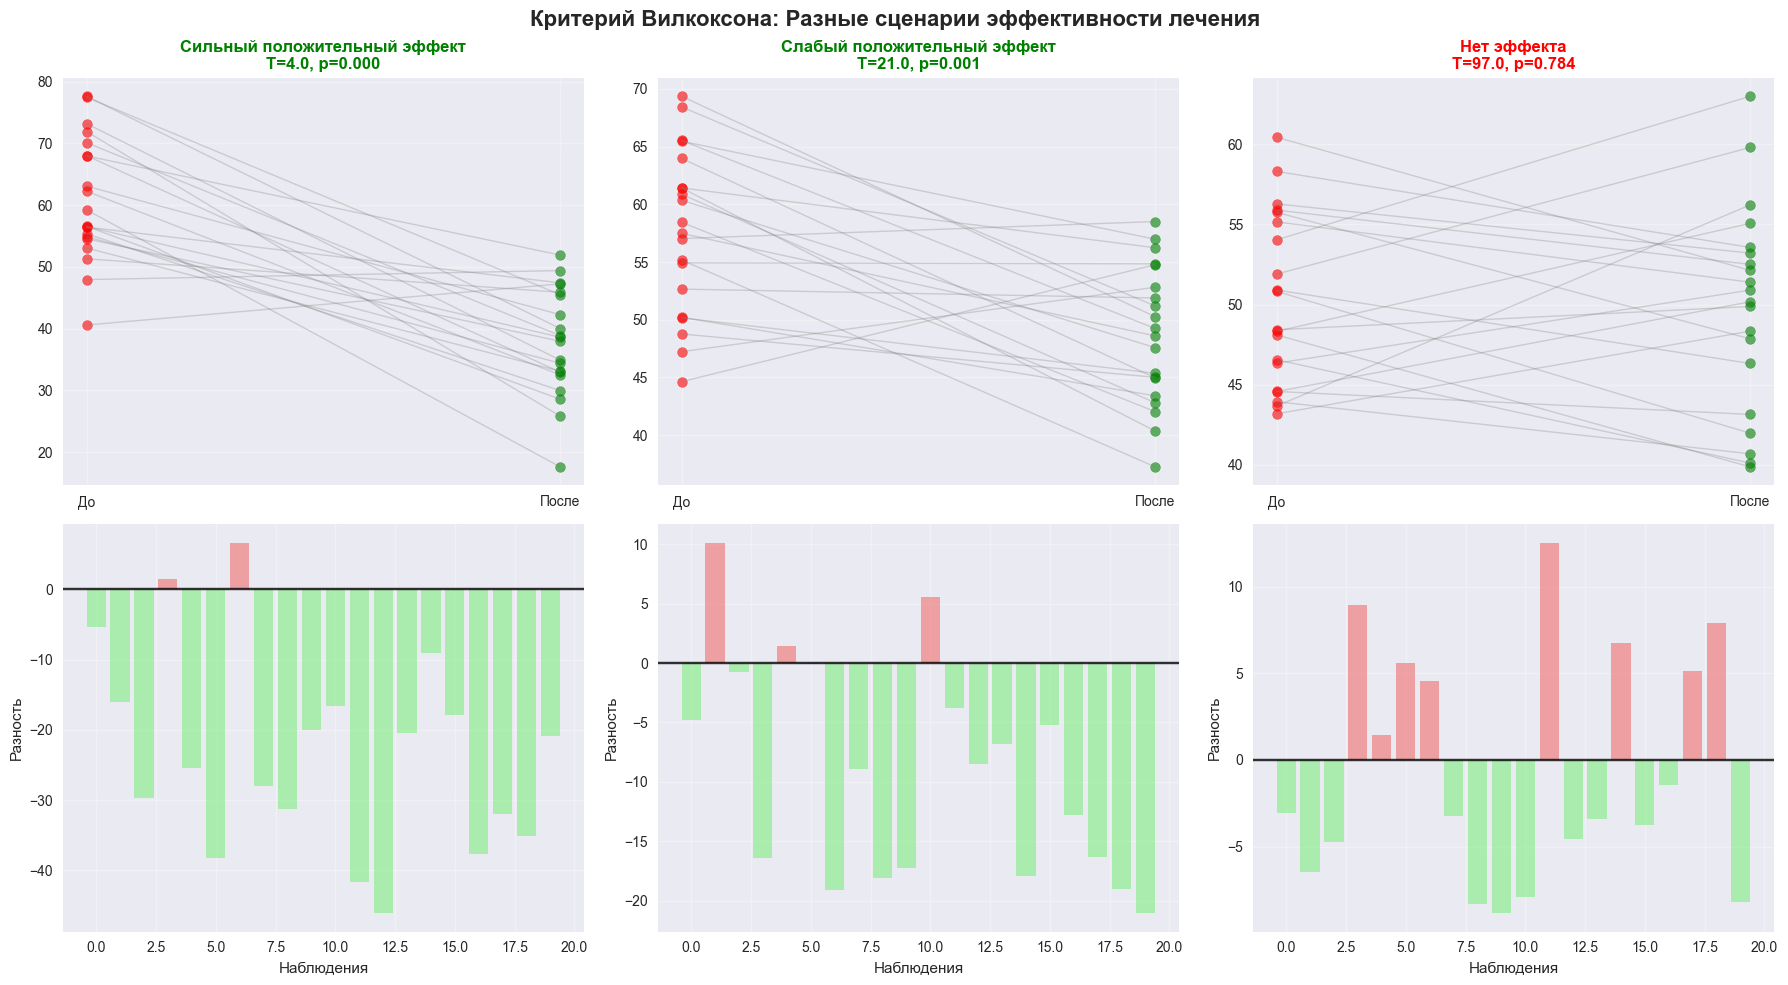


📈 Визуализация размера эффекта...


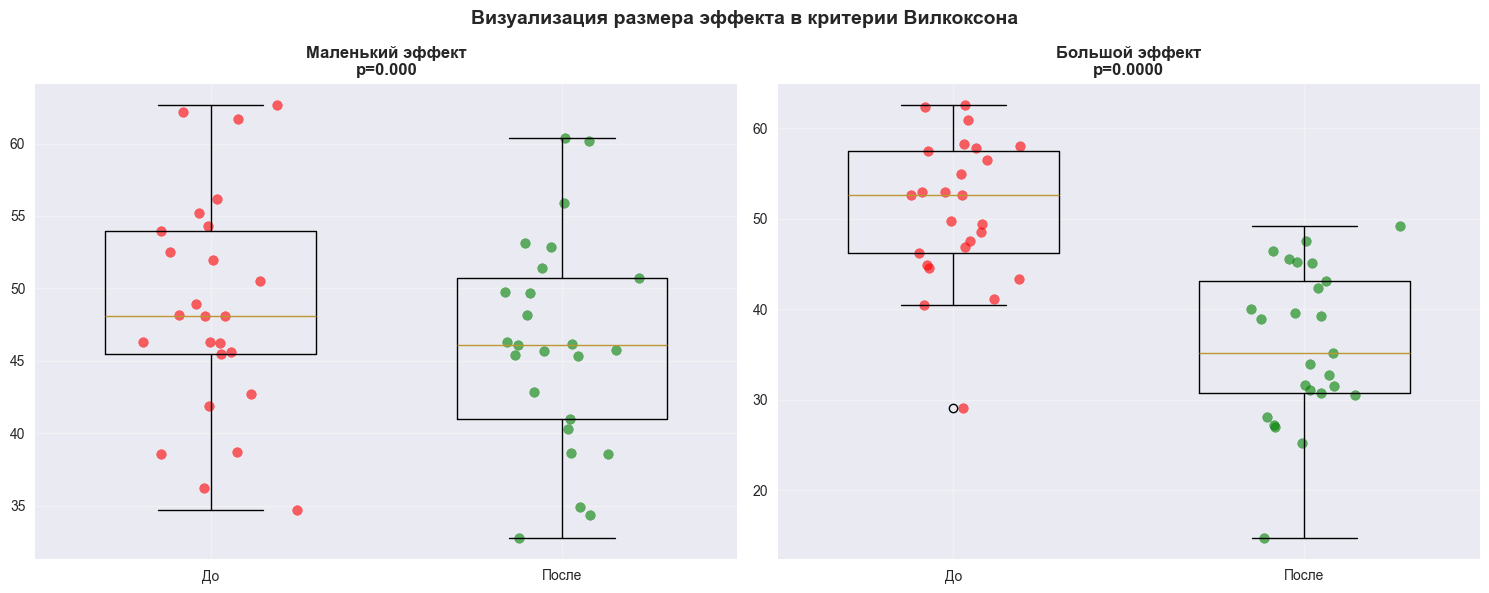

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pandas as pd
from matplotlib.patches import FancyBboxPatch, ConnectionPatch

# Настройка стиля
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
import warnings
warnings.filterwarnings('ignore')

def wilcoxon_visual_demo():
    """
    Графическая демонстрация критерия Вилкоксона для парных измерений
    """
    # Создаем фигуру с несколькими subplots
    fig = plt.figure(figsize=(20, 18))
    
    # Генерируем пример данных "до" и "после"
    np.random.seed(42)
    n_patients = 15
    
    # Базовые значения
    baseline = np.random.normal(50, 10, n_patients)
    
    # Эффект лечения + случайный шум
    treatment_effect = np.random.normal(15, 5, n_patients)
    after = baseline - treatment_effect + np.random.normal(0, 3, n_patients)
    
    # Ограничим значения разумными пределами
    baseline = np.clip(baseline, 20, 80)
    after = np.clip(after, 15, 75)
    
    # 1. Визуализация парных измерений
    ax1 = plt.subplot2grid((4, 3), (0, 0), colspan=3)
    
    # Линии между парными измерениями
    for i in range(n_patients):
        ax1.plot([1, 2], [baseline[i], after[i]], 
                color='gray', alpha=0.5, linewidth=1)
    
    # Точки измерений
    scatter_before = ax1.scatter([1] * n_patients, baseline, 
                               s=80, color='red', alpha=0.7, label='До лечения', zorder=3)
    scatter_after = ax1.scatter([2] * n_patients, after, 
                              s=80, color='green', alpha=0.7, label='После лечения', zorder=3)
    
    ax1.set_xlim(0.5, 2.5)
    ax1.set_xticks([1, 2])
    ax1.set_xticklabels(['До лечения', 'После лечения'], fontsize=12)
    ax1.set_ylabel('Показатель эффективности', fontsize=12)
    ax1.set_title('1. Парные измерения: До vs После лечения', fontsize=14, fontweight='bold')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # 2. Разности между измерениями
    ax2 = plt.subplot2grid((4, 3), (1, 0), colspan=2)
    
    differences = after - baseline
    
    # Столбчатая диаграмма разностей
    bars = ax2.bar(range(n_patients), differences, 
                  color=np.where(differences < 0, 'lightcoral', 'lightgreen'),
                  alpha=0.7, edgecolor='black')
    
    ax2.axhline(y=0, color='black', linestyle='-', alpha=0.8)
    ax2.set_xlabel('Пациенты')
    ax2.set_ylabel('Разность (После - До)')
    ax2.set_title('2. Разности между парными измерениями', fontsize=12, fontweight='bold')
    
    # Добавляем значения на столбцы
    for i, bar in enumerate(bars):
        height = bar.get_height()
        va = 'bottom' if height > 0 else 'top'
        ax2.text(bar.get_x() + bar.get_width()/2, height + (0.5 if height > 0 else -0.5),
                f'{height:.1f}', ha='center', va=va, fontsize=8, fontweight='bold')
    
    ax2.grid(True, alpha=0.3)
    
    # 3. Абсолютные значения разностей и ранги
    ax3 = plt.subplot2grid((4, 3), (1, 2))
    
    # Вычисляем абсолютные значения и ранги
    abs_differences = np.abs(differences)
    
    # Игнорируем нулевые разности для ранжирования
    nonzero_mask = abs_differences != 0
    abs_nonzero = abs_differences[nonzero_mask]
    
    # Ранжируем абсолютные значения
    ranks = stats.rankdata(abs_nonzero)
    
    # Визуализация первых 10 ненулевых разностей
    n_display = min(10, len(ranks))
    y_pos = np.arange(n_display)
    
    colors_abs = ['lightblue' if diff > 0 else 'lightcoral' 
                 for diff in differences[nonzero_mask][:n_display]]
    
    bars = ax3.barh(y_pos, abs_nonzero[:n_display], color=colors_abs, alpha=0.7)
    ax3.set_yticks(y_pos)
    ax3.set_yticklabels([f'Ранг {int(r)}' for r in ranks[:n_display]])
    ax3.set_xlabel('Абсолютная разность')
    ax3.set_title('3. Абсолютные разности и ранги', fontsize=12, fontweight='bold')
    
    # Добавляем значения на столбцы
    for i, (bar, value) in enumerate(zip(bars, abs_nonzero[:n_display])):
        ax3.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, 
                f'{value:.1f}', ha='left', va='center', fontsize=9)
    
    ax3.grid(True, alpha=0.3)
    
    # 4. Разделение рангов по знакам
    ax4 = plt.subplot2grid((4, 3), (2, 0))
    
    # Разделяем ранги на положительные и отрицательные
    positive_ranks = ranks[differences[nonzero_mask] > 0]
    negative_ranks = ranks[differences[nonzero_mask] < 0]
    
    sum_positive = np.sum(positive_ranks) if len(positive_ranks) > 0 else 0
    sum_negative = np.sum(negative_ranks) if len(negative_ranks) > 0 else 0
    
    # Визуализация сумм рангов
    rank_sums = [sum_positive, sum_negative]
    labels = ['Положительные\nранги', 'Отрицательные\nранги']
    colors = ['lightgreen', 'lightcoral']
    
    bars = ax4.bar(labels, rank_sums, color=colors, alpha=0.7, edgecolor='black')
    ax4.set_ylabel('Сумма рангов')
    ax4.set_title('4. Суммы рангов по знакам', fontsize=12, fontweight='bold')
    
    # Добавляем значения на столбцы
    for bar, value in zip(bars, rank_sums):
        ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
                f'T={int(value)}', ha='center', va='bottom', fontweight='bold')
    
    ax4.grid(True, alpha=0.3)
    
    # 5. Вычисление T-статистики
    ax5 = plt.subplot2grid((4, 3), (2, 1))
    
    # T-статистика - меньшая из сумм рангов
    T_stat = min(sum_positive, sum_negative)
    
    # Визуализация T-статистики
    t_values = [sum_positive, sum_negative, T_stat]
    t_labels = ['T⁺', 'T⁻', 'T = min(T⁺, T⁻)']
    t_colors = ['lightgreen', 'lightcoral', 'gold']
    
    bars = ax5.bar(t_labels, t_values, color=t_colors, alpha=0.7, edgecolor='black')
    ax5.set_ylabel('T-статистика')
    ax5.set_title('5. Вычисление T-статистики', fontsize=12, fontweight='bold')
    
    # Добавляем значения на столбцы
    for bar, value in zip(bars, t_values):
        ax5.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
                f'{value:.1f}', ha='center', va='bottom', fontweight='bold')
    
    ax5.grid(True, alpha=0.3)
    
    # 6. Статистическая значимость
    ax6 = plt.subplot2grid((4, 3), (2, 2))
    
    # Выполняем тест Вилкоксона
    try:
        T_stat_scipy, p_value = stats.wilcoxon(baseline, after)
    except:
        # Если все разности нулевые
        T_stat_scipy, p_value = 0, 1.0
    
    # Визуализация p-value
    significance_level = 0.05
    x = [0, 1]
    y = [p_value, significance_level]
    labels = ['p-value', 'α = 0.05']
    colors_sig = ['red' if p_value < significance_level else 'blue', 'green']
    
    bars = ax6.bar(labels, y, color=colors_sig, alpha=0.7, edgecolor='black')
    ax6.set_ylabel('Вероятность')
    ax6.set_title('6. Проверка значимости', fontsize=12, fontweight='bold')
    ax6.axhline(y=significance_level, color='green', linestyle='--', alpha=0.7, 
                label='Уровень значимости')
    
    # Добавляем значения на столбцы
    for bar, value in zip(bars, y):
        ax6.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005, 
                f'{value:.4f}', ha='center', va='bottom', fontweight='bold')
    
    ax6.legend()
    ax6.grid(True, alpha=0.3)
    
    # 7. Финальный результат и интерпретация
    ax7 = plt.subplot2grid((4, 3), (3, 0), colspan=3)
    
    # Определяем направление эффекта
    median_before = np.median(baseline)
    median_after = np.median(after)
    effect_direction = "улучшение" if median_after < median_before else "ухудшение"
    
    result_text = f"""
    📊 РЕЗУЛЬТАТЫ КРИТЕРИЯ ВИЛКОКСОНА:
    
    • T-статистика = {T_stat:.1f}
    • p-value = {p_value:.4f}
    • Уровень значимости α = {significance_level}
    • Медиана до: {median_before:.1f}
    • Медиана после: {median_after:.1f}
    
    📈 ВЫВОД: {'СТАТИСТИЧЕСКИ ЗНАЧИМОЕ ' if p_value < significance_level else 'НЕТ СТАТИСТИЧЕСКИ ЗНАЧИМОГО '}
    {'ИЗМЕНЕНИЯ' if p_value < significance_level else 'ИЗМЕНЕНИЯ'}
    
    💡 ИНТЕРПРЕТАЦИЯ: {f'Наблюдается статистически значимое {effect_direction} показателя' 
                      if p_value < significance_level else 'Изменения не являются статистически значимыми'}
    """
    
    # Создаем fancy bounding box
    fancy_bbox = FancyBboxPatch((0.05, 0.05), 0.9, 0.9,
                              boxstyle="round,pad=0.02",
                              facecolor='lightyellow',
                              edgecolor='gold',
                              linewidth=2)
    ax7.add_patch(fancy_bbox)
    
    ax7.text(0.5, 0.7, result_text, ha='center', va='center', fontsize=14, 
            fontfamily='monospace', linespacing=1.5, transform=ax7.transAxes)
    
    # Добавляем эмодзи в зависимости от результата
    emoji = "✅" if p_value < significance_level else "❌"
    ax7.text(0.5, 0.9, emoji, ha='center', va='center', fontsize=40, 
            transform=ax7.transAxes)
    
    ax7.set_xlim(0, 1)
    ax7.set_ylim(0, 1)
    ax7.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # Дополнительная информация в консоли
    print("\n" + "="*60)
    print("ДЕТАЛЬНАЯ СТАТИСТИЧЕСКАЯ ИНФОРМАЦИЯ:")
    print("="*60)
    print(f"Количество парных наблюдений: {n_patients}")
    print(f"Медиана до: {median_before:.2f}")
    print(f"Медиана после: {median_after:.2f}")
    print(f"Средняя разность: {np.mean(differences):.2f}")
    print(f"Количество ненулевых разностей: {np.sum(nonzero_mask)}")
    print(f"Сумма положительных рангов (T⁺): {sum_positive:.1f}")
    print(f"Сумма отрицательных рангов (T⁻): {sum_negative:.1f}")
    print(f"T-статистика: {T_stat:.1f}")
    print(f"p-value: {p_value:.4f}")

def wilcoxon_interactive_examples():
    """
    Интерактивные примеры критерия Вилкоксона для разных сценариев
    """
    np.random.seed(123)
    n = 20
    
    scenarios = {
        'Сильный положительный эффект': (
            np.random.normal(60, 8, n),
            np.random.normal(40, 8, n)  # Явное улучшение
        ),
        'Слабый положительный эффект': (
            np.random.normal(55, 6, n),
            np.random.normal(50, 6, n)  # Слабое улучшение
        ),
        'Нет эффекта': (
            np.random.normal(50, 5, n),
            np.random.normal(50, 5, n)  # Нет изменений
        )
    }
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    
    for idx, (scenario_name, (before, after)) in enumerate(scenarios.items()):
        # Выполняем тест Вилкоксона
        try:
            T_stat, p_value = stats.wilcoxon(before, after)
        except:
            T_stat, p_value = 0, 1.0
        
        # Верхний ряд: парные измерения
        ax_top = axes[0, idx]
        for i in range(len(before)):
            ax_top.plot([1, 2], [before[i], after[i]], 
                       color='gray', alpha=0.3, linewidth=1)
        
        ax_top.scatter([1] * len(before), before, s=50, color='red', alpha=0.6)
        ax_top.scatter([2] * len(after), after, s=50, color='green', alpha=0.6)
        
        ax_top.set_xticks([1, 2])
        ax_top.set_xticklabels(['До', 'После'])
        ax_top.set_title(f'{scenario_name}\nT={T_stat:.1f}, p={p_value:.3f}', 
                        fontweight='bold', color='green' if p_value < 0.05 else 'red')
        ax_top.grid(True, alpha=0.3)
        
        # Нижний ряд: разности
        ax_bottom = axes[1, idx]
        differences = after - before
        colors = ['lightgreen' if diff < 0 else 'lightcoral' for diff in differences]
        
        bars = ax_bottom.bar(range(len(differences)), differences, color=colors, alpha=0.7)
        ax_bottom.axhline(y=0, color='black', linestyle='-', alpha=0.8)
        ax_bottom.set_xlabel('Наблюдения')
        ax_bottom.set_ylabel('Разность')
        ax_bottom.grid(True, alpha=0.3)
    
    plt.suptitle('Критерий Вилкоксона: Разные сценарии эффективности лечения', 
                fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

def wilcoxon_effect_size_visualization():
    """
    Визуализация размера эффекта для критерия Вилкоксона
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Генерируем данные с разным размером эффекта
    np.random.seed(42)
    n = 25
    
    # Маленький эффект
    before_small = np.random.normal(50, 8, n)
    after_small = before_small - np.random.normal(3, 2, n)
    
    # Большой эффект
    before_large = np.random.normal(50, 8, n)
    after_large = before_large - np.random.normal(15, 3, n)
    
    # Вычисляем статистики
    T_small, p_small = stats.wilcoxon(before_small, after_small)
    T_large, p_large = stats.wilcoxon(before_large, after_large)
    
    # Визуализация маленького эффекта
    ax1.boxplot([before_small, after_small], positions=[1, 2], widths=0.6)
    ax1.scatter(np.random.normal(1, 0.1, n), before_small, alpha=0.6, color='red')
    ax1.scatter(np.random.normal(2, 0.1, n), after_small, alpha=0.6, color='green')
    ax1.set_xticks([1, 2])
    ax1.set_xticklabels(['До', 'После'])
    ax1.set_title(f'Маленький эффект\np={p_small:.3f}', fontweight='bold')
    ax1.grid(True, alpha=0.3)
    
    # Визуализация большого эффекта
    ax2.boxplot([before_large, after_large], positions=[1, 2], widths=0.6)
    ax2.scatter(np.random.normal(1, 0.1, n), before_large, alpha=0.6, color='red')
    ax2.scatter(np.random.normal(2, 0.1, n), after_large, alpha=0.6, color='green')
    ax2.set_xticks([1, 2])
    ax2.set_xticklabels(['До', 'После'])
    ax2.set_title(f'Большой эффект\np={p_large:.4f}', fontweight='bold')
    ax2.grid(True, alpha=0.3)
    
    plt.suptitle('Визуализация размера эффекта в критерии Вилкоксона', 
                fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

# Запуск демонстрации
if __name__ == "__main__":
    print("🚀 Запуск графической демонстрации критерия Вилкоксона...")
    wilcoxon_visual_demo()
    
    print("\n🎯 Интерактивные примеры с разными сценариями...")
    wilcoxon_interactive_examples()
    
    print("\n📈 Визуализация размера эффекта...")
    wilcoxon_effect_size_visualization()